In [25]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

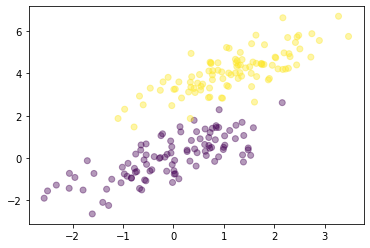

In [26]:
np.random.seed(0)
num_observations = 100

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),np.ones(num_observations)))

plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

-136.42884355145677
-11.337417289071691
-8.030332002372269
-6.7341397893744634
-6.017025460548004
-5.552954206871746
-5.2240758756025905
-4.976713571551645
-4.782669709549551
-4.625608990314926
-4.495365682773633
-4.385257061355069
-4.290695338595469
-4.208418081757619
-4.136036680852776
-4.071758809122728
-4.014211055191148
-3.962321756777516
-3.9152413647161675
-3.8722869560988658
-3.8329027216192113
-3.796631279865882
-3.7630924901512355
-3.731967559967841
-3.7029869564398576
-3.675921094090188
-3.6505730780263796
-3.6267729888087246
-3.6043733375722
-3.583245419283075
Accuracy from scratch: 0.99


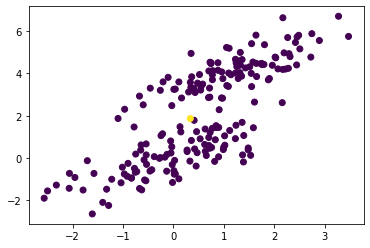

In [27]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))

plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = preds == simulated_labels - 1)